In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn import datasets
from sklearn.cluster import KMeans 
from scipy.spatial.distance import cdist

In [2]:
df=pd.read_excel("/Users/rociocuestapedraz/Desktop/PYTHON bootcamp DS/datasets/TFMSofiaMachine.xlsx")

In [3]:
df.head()

,key,genus,species_code,decimalLon,decimalLat,HabitatOri,HabitatNUM,Habitat0,HabitOrigi,HabitNUM,Habit0,stolons,dimorphism
0,388880859,Woodwardia,Woodwardia_orientalis,139.31,35.55,Terrestrial,3,Terrestrial,Short-creeping,2,Short creeping,No,Monomorphic
1,388880863,Woodwardia,Woodwardia_orientalis,139.21,35.59,Terrestrial,3,Terrestrial,Short-creeping,2,Short creeping,No,Monomorphic
2,388880897,Woodwardia,Woodwardia_orientalis,139.22,35.29,Terrestrial,3,Terrestrial,Short-creeping,2,Short creeping,No,Monomorphic
3,388880901,Woodwardia,Woodwardia_orientalis,139.14,35.36,Terrestrial,3,Terrestrial,Short-creeping,2,Short creeping,No,Monomorphic
4,388880902,Woodwardia,Woodwardia_orientalis,139.22,35.60,Terrestrial,3,Terrestrial,Short-creeping,2,Short creeping,No,Monomorphic


In [4]:
df2=df[df["genus"]=="Woodwardia"]

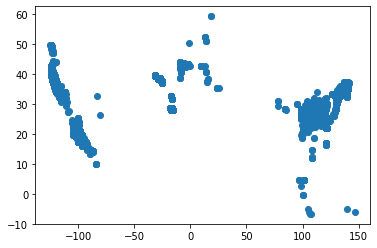

In [5]:
plt.scatter(df2["decimalLon"], df2["decimalLat"], marker='o')
plt.show()

In [6]:
X=np.array(df2[["decimalLon","decimalLat"]])

In [7]:
from sklearn.preprocessing import MinMaxScaler
X = MinMaxScaler().fit_transform(X)

In [8]:
inercias = [] 
  
for k in range(1,11): 
    kmeans = KMeans(k)
    kmeans.fit(X)     
    inercias.append(kmeans.inertia_) 
inercias

[1156.966200820855,
 203.91882541619358,
 73.36029823644654,
 47.356940932374044,
 27.131913783311333,
 17.39449532625389,
 12.944218017866215,
 9.91790469796415,
 7.790482830602402,
 6.632983366217038]

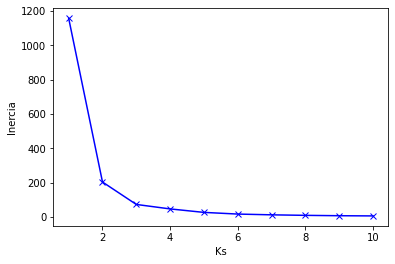

In [9]:
plt.plot(range(1,11), inercias, 'bx-') 
plt.xlabel('Ks') 
plt.ylabel('Inercia') 
plt.show()

In [10]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [11]:
kmeans.labels_

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [16]:
df2["clase"]=kmeans.labels_
df2.head()

/Users/rociocuestapedraz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,key,genus,species_code,decimalLon,decimalLat,HabitatOri,HabitatNUM,Habitat0,HabitOrigi,HabitNUM,Habit0,stolons,dimorphism,clase
0,388880859,Woodwardia,Woodwardia_orientalis,139.31,35.55,Terrestrial,3,Terrestrial,Short-creeping,2,Short creeping,No,Monomorphic,1
1,388880863,Woodwardia,Woodwardia_orientalis,139.21,35.59,Terrestrial,3,Terrestrial,Short-creeping,2,Short creeping,No,Monomorphic,1
2,388880897,Woodwardia,Woodwardia_orientalis,139.22,35.29,Terrestrial,3,Terrestrial,Short-creeping,2,Short creeping,No,Monomorphic,1
3,388880901,Woodwardia,Woodwardia_orientalis,139.14,35.36,Terrestrial,3,Terrestrial,Short-creeping,2,Short creeping,No,Monomorphic,1
4,388880902,Woodwardia,Woodwardia_orientalis,139.22,35.60,Terrestrial,3,Terrestrial,Short-creeping,2,Short creeping,No,Monomorphic,1


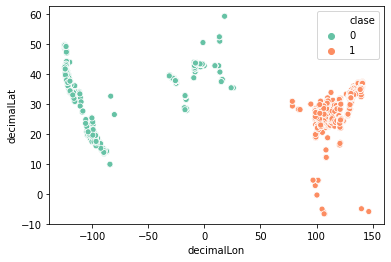

In [18]:
sns.scatterplot(df2["decimalLon"], df2["decimalLat"], hue = df2["clase"], palette="Set2")
plt.show()

In [28]:
df=pd.read_csv("/Users/rociocuestapedraz/Desktop/PYTHON bootcamp DS/datasets/Cust_Segmentation.csv")

In [30]:
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [33]:
df_=df[["Age","Edu","Years Employed","Income","Card Debt","Defaulted"]]

In [34]:
#Normalizo los df_num
from sklearn.preprocessing import MinMaxScaler
df2 = MinMaxScaler().fit_transform(df_)
df2 = pd.DataFrame(df2, columns = df_.columns)
df2.head()

,Age,Edu,Years Employed,Income,Card Debt,Defaulted
0,0.583333,0.25,0.181818,0.013857,0.005450,0.0
1,0.750000,0.00,0.787879,0.200924,0.222395,0.0
2,0.361111,0.25,0.303030,0.101617,0.296803,1.0
3,0.250000,0.25,0.121212,0.013857,0.032556,0.0
4,0.750000,0.00,0.939394,0.554273,0.452382,0.0


In [36]:
for col in df.columns:
    suma_nans=pd.isnull(df[col]).values.ravel().sum()
    print(col,"=",(suma_nans/df.shape[0])*100,"%")

Customer Id = 0.0 %
Age = 0.0 %
Edu = 0.0 %
Years Employed = 0.0 %
Income = 0.0 %
Card Debt = 0.0 %
Other Debt = 0.0 %
Defaulted = 17.647058823529413 %
Address = 0.0 %
DebtIncomeRatio = 0.0 %


In [38]:
#Imputacion del df categorico:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
df2[["Defaulted"]] = imputer.fit_transform(df2[["Defaulted"]])
#df_cat = pd.DataFrame(df_cat_imp, columns = df_cat.columns)
df2.isnull().values.any()

False

### Age vs Income

In [39]:
X=np.array(df2[["Age","Income"]])

In [40]:
inercias = [] 
  
for k in range(1,11): 
    kmeans = KMeans(k)
    kmeans.fit(X)     
    inercias.append(kmeans.inertia_) 
inercias

[49.08835737888344,
 18.283597954529696,
 11.180984796340159,
 8.689081959844067,
 6.436496166272554,
 5.1866391318175635,
 4.501227786716546,
 3.821978793613456,
 3.3260991414562007,
 2.9365177498585218]

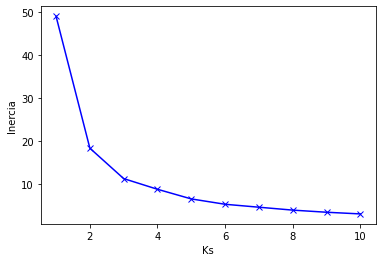

In [41]:
plt.plot(range(1,11), inercias, 'bx-') 
plt.xlabel('Ks') 
plt.ylabel('Inercia') 
plt.show()

In [42]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
df4=df2[["Age","Income"]]
df4["clase"]=kmeans.labels_

/Users/rociocuestapedraz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


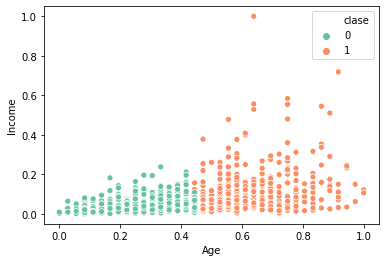

In [43]:
sns.scatterplot(df4["Age"], df4["Income"], hue = df4["clase"], palette="Set2")
plt.show()

In [45]:
df2.columns

Index(['Age', 'Edu', 'Years Employed', 'Income', 'Card Debt', 'Defaulted'], dtype='object')

### Edu vs Card debit

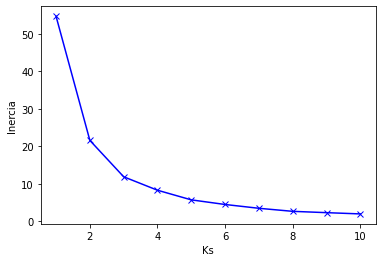

In [46]:
X=np.array(df2[["Edu",'Card Debt']])
inercias = [] 
  
for k in range(1,11): 
    kmeans = KMeans(k)
    kmeans.fit(X)     
    inercias.append(kmeans.inertia_)

plt.plot(range(1,11), inercias, 'bx-') 
plt.xlabel('Ks') 
plt.ylabel('Inercia') 
plt.show()

/Users/rociocuestapedraz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


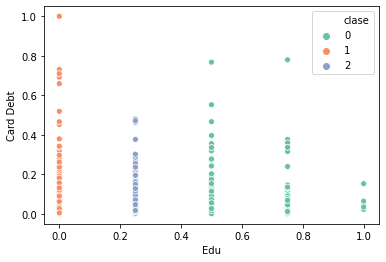

In [47]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
df5=df2[["Edu",'Card Debt']]
df5["clase"]=kmeans.labels_
sns.scatterplot(df5["Edu"], df5['Card Debt'], hue = df5["clase"], palette="Set2")
plt.show()

### Year Income vs 'Years Employed'

In [49]:
df2.columns

Index(['Age', 'Edu', 'Years Employed', 'Income', 'Card Debt', 'Defaulted'], dtype='object')

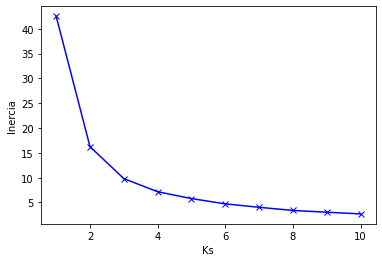

In [50]:
X=np.array(df2[['Years Employed','Income']])
inercias = [] 
  
for k in range(1,11): 
    kmeans = KMeans(k)
    kmeans.fit(X)     
    inercias.append(kmeans.inertia_)

plt.plot(range(1,11), inercias, 'bx-') 
plt.xlabel('Ks') 
plt.ylabel('Inercia') 
plt.show()

/Users/rociocuestapedraz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


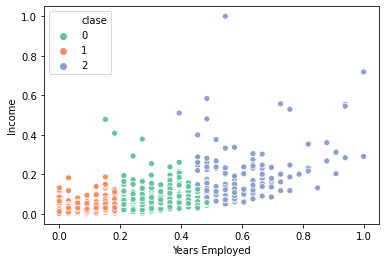

In [51]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
df5=df2[['Years Employed','Income']]
df5["clase"]=kmeans.labels_
sns.scatterplot(df5['Years Employed'], df5['Income'], hue = df5["clase"], palette="Set2")

In [52]:
df2

,Age,Edu,Years Employed,Income,Card Debt,Defaulted
0,0.583333,0.25,0.181818,0.013857,0.005450,0.000000
1,0.750000,0.00,0.787879,0.200924,0.222395,0.000000
2,0.361111,0.25,0.303030,0.101617,0.296803,1.000000
3,0.250000,0.25,0.121212,0.013857,0.032556,0.000000
4,0.750000,0.00,0.939394,0.554273,0.452382,0.000000
...,...,...,...,...,...,...
845,0.194444,0.00,0.151515,0.030023,0.026084,0.261429
846,0.222222,0.25,0.212121,0.048499,0.016886,0.000000
847,0.138889,0.75,0.000000,0.011547,0.135773,1.000000
848,0.333333,0.00,0.363636,0.034642,0.005061,0.000000


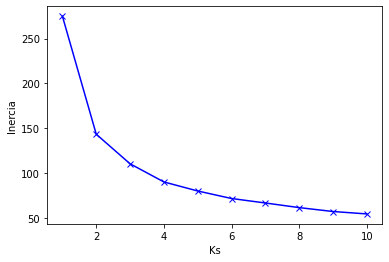

In [53]:
X=np.array(df2)
inercias = [] 
  
for k in range(1,11): 
    kmeans = KMeans(k)
    kmeans.fit(X)     
    inercias.append(kmeans.inertia_)

plt.plot(range(1,11), inercias, 'bx-') 
plt.xlabel('Ks') 
plt.ylabel('Inercia') 
plt.show()

In [54]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
df2["clase"]=kmeans.labels_

In [55]:
df2

,Age,Edu,Years Employed,Income,Card Debt,Defaulted,clase
0,0.583333,0.25,0.181818,0.013857,0.005450,0.000000,0
1,0.750000,0.00,0.787879,0.200924,0.222395,0.000000,1
2,0.361111,0.25,0.303030,0.101617,0.296803,1.000000,2
3,0.250000,0.25,0.121212,0.013857,0.032556,0.000000,0
4,0.750000,0.00,0.939394,0.554273,0.452382,0.000000,1
...,...,...,...,...,...,...,...
845,0.194444,0.00,0.151515,0.030023,0.026084,0.261429,0
846,0.222222,0.25,0.212121,0.048499,0.016886,0.000000,0
847,0.138889,0.75,0.000000,0.011547,0.135773,1.000000,2
848,0.333333,0.00,0.363636,0.034642,0.005061,0.000000,0


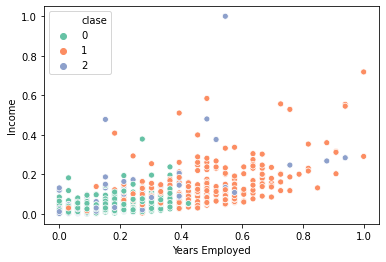

In [56]:
sns.scatterplot(df2['Years Employed'], df2['Income'], hue = df2["clase"], palette="Set2")

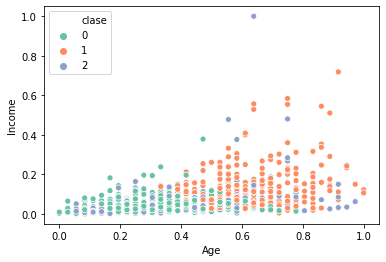

In [58]:
sns.scatterplot(df2['Age'], df2['Income'], hue = df2["clase"], palette="Set2")

In [57]:
df2.columns

Index(['Age', 'Edu', 'Years Employed', 'Income', 'Card Debt', 'Defaulted',
       'clase'],
      dtype='object')